In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from mlxtend.plotting import plot_decision_regions

data = pd.read_csv("./Iris.csv")
# Select the first two features (sepal_length and sepal_width)
X = data[["PetalWidthCm", "PetalLengthCm"]]

# The target variable (species) is usually in the last column of the Iris dataset
le = LabelEncoder()
data['Species-N'] = le.fit_transform(data['Species'])
y = data["Species-N"].values

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVM classifiers with linear and sigmoid kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)

# Train SVM classifiers
svm_linear.fit(X_train_scaled, y_train)
svm_sigmoid.fit(X_train_scaled, y_train)

# Evaluate performance
def evaluate_performance(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

accuracy_linear, report_linear = evaluate_performance(svm_linear, X_test_scaled, y_test)
accuracy_sigmoid, report_sigmoid = evaluate_performance(svm_sigmoid, X_test_scaled, y_test)

print("Linear SVM Accuracy:", accuracy_linear)
print("Linear SVM Classification Report:\n", report_linear)
print("Sigmoid SVM Accuracy:", accuracy_sigmoid)
print("Sigmoid SVM Classification Report:\n", report_sigmoid)

Linear SVM Accuracy: 1.0
Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Sigmoid SVM Accuracy: 0.9333333333333333
Sigmoid SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



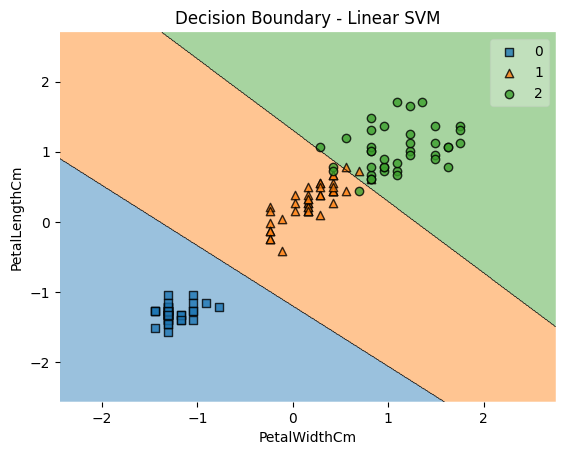

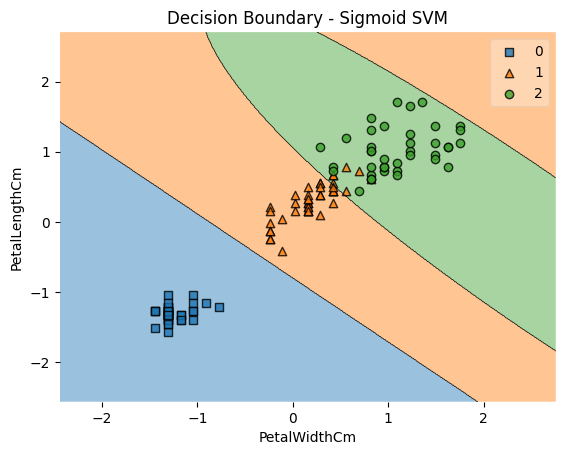

In [32]:
# Plot decision boundaries
# Plot decision boundary for Linear SVM
plot_decision_regions(X_train_scaled[:,:2], y_train, clf=svm_linear)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Decision Boundary - Linear SVM')
plt.show()
# Plot decision boundary for Sigmoid SVM
plot_decision_regions(X_train_scaled[:,:2], y_train, clf=svm_sigmoid)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Decision Boundary - Sigmoid SVM')
plt.show()